In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# de targetvariabele is de echte tijd tegenover de voorspelde tijd
df = pd.read_csv('sap_storing_data_hu_project.csv', low_memory=False)

In [3]:
df = df.drop(['stm_sap_mon_meld_ddt', 'stm_mon_begin_ddt', 'stm_mon_toelichting_trdl', 'stm_oh_pg_mld', 
         'stm_scenario_mon', 'stm_mon_nr_status_omschr', 'stm_mon_nr__statuscode', 'stm_mon_nr_status_wijzdd', 
         'stm_aanntpl_ddt', 'stm_objectdl_code_gst', 'stm_objectdl_groep_gst', 'stm_progfh_in_ddt', 
         'stm_progfh_in_invoer_ddt', 'stm_progfh_gw_ddt', 'stm_progfh_gw_lwd_ddt', 'stm_progfh_hz', 
         'stm_veroorz_groep', 'stm_veroorz_code', 'stm_veroorz_tekst_kort', 'stm_effect', 'stm_afspr_aanvangddt', 
         'stm_mon_eind_ddt', 'stm_mon_vhdsincident', 'stm_dir_betrok_tr', 'stm_aangelegd_dd', 'stm_aangelegd_tijd',
         'stm_mon_begindatum', 'stm_mon_begintijd', 'stm_progfh_gw_datum', 'stm_mon_eind_datum',
         'stm_mon_eind_tijd', 'stm_controle_dd', 'stm_akkoord_mon_toewijz', 'stm_status_sapnaarmon',
         'stm_fact_jn', 'stm_akkoord_melding_jn', 'stm_afsluit_ddt', 'stm_afsluit_dd', 'stm_afsluit_tijd',
         'stm_rec_toegev_ddt', 'stm_hinderwaarde', 'stm_actie', 'stm_standplaats', 'stm_status_gebr',
         'stm_wbi_nummer', 'stm_projnr', 'stm_historie_toelichting', 'stm_schade_verhaalb_jn', 'stm_schadenr',
         'stm_schade_status_ga', 'stm_schade_statusdatum', 'stm_relatiervo_vorig', 'stm_relatiervo_volgend',
         'stm_relatiervo', 'stm_afspr_func_hersteldd', 'stm_afspr_func_hersteltijd', 'stm_sorteerveld',
         'stm_rapportage_maand', 'stm_rapportage_jaar', 'stm_x_bron_publ_dt', 'stm_x_bron_bestandsnaam',
         'stm_x_bron_arch_dt', 'stm_x_actueel_ind', 'stm_x_run_id', 'stm_x_bk', 'stm_x_start_sessie_dt',
         'stm_x_vervallen_ind'], axis='columns')

In [4]:
df

,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,...,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50053211,0.0,NaN,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,Logboeknr Geeltje : 49 Tijd: 0900,624.0,624.0,NaN,...,09:00:00,0.0,1.000000e+08,02/01/2006,09:00:00,NaN,NaN,NaN,NaN,NaN
2,2,50053213,48.0,GN,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-Post: ...,Logboeknr RBV : 48 Tijd: 1235 VL-P,201.0,201.0,NaN,...,13:26:00,51.0,1.000000e+08,02/01/2006,13:26:00,schapen op de spoorbaan!,NaN,NaN,Lp,Apg
3,3,50053214,72.0,ZL,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-Post: ...,Logboeknr RBV : 72 Tijd: 1640 VL-P,25.0,25.0,NaN,...,17:20:00,40.0,1.000000e+08,02/01/2006,17:20:00,Persoon langs de baan,NaN,NaN,Hgl,NaN
4,4,50053215,96.0,ZL,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-Post: ...,Logboeknr RBV : 96 Tijd: 2230 VL-P,12.0,12.0,NaN,...,22:36:00,6.0,1.000000e+08,02/01/2006,22:36:00,Bijna aanrijding met persoon,NaN,NaN,Hgv,NaN
5,5,50053218,38.0,EHV,02/01/2006 11:23:00,Logboeknr RBV : 38 Tijd: 1123 VL-Post: ...,Logboeknr RBV : 38 Tijd: 1123 VL-P,614.0,614.0,10621391.0,...,11:30:00,7.0,1.000000e+08,NaN,00:00:00,Geen SMC-melding.Geen onderzoek geweest.,NaN,NaN,Ht,NaN
6,6,50053219,99.0,EHV,02/01/2006 23:25:00,Logboeknr RBV : 99 Tijd: 2325 VL-Post: ...,Logboeknr RBV : 99 Tijd: 2325 VL-P,551.0,551.0,NaN,...,23:38:00,13.0,1.000000e+08,03/01/2006,09:44:00,Geen SMC-melding.,NaN,NaN,Tb,NaN
7,7,50053220,0.0,NaN,02/01/2006 16:45:00,Logboeknr Geeltje : 79 Tijd: 1645 VL-Po...,Logboeknr Geeltje : 79 Tijd: 1645,17.0,17.0,NaN,...,17:00:00,15.0,1.000000e+08,02/01/2006,17:00:00,Loslopend paard,NaN,NaN,NaN,NaN
8,8,50053222,0.0,NaN,02/01/2006 14:18:00,Logboeknr Geeltje : 73 Tijd: 1418 VL-Po...,Logboeknr Geeltje : 73 Tijd: 1418,506.0,506.0,10680137.0,...,14:48:00,30.0,1.000000e+08,02/01/2006,14:48:00,Bijna aanrijding met een vrachtauto,NaN,NaN,NaN,NaN
9,9,50053223,0.0,NaN,02/01/2006 12:00:00,Logboeknr Geeltje : 65 Tijd: 1200 VL-Po...,Logboeknr Geeltje : 65 Tijd: 1200,73.0,73.0,NaN,...,12:00:00,0.0,1.000000e+08,02/01/2006,12:00:00,werkz in WBI407989 zijn niet doorgegaan,NaN,NaN,NaN,NaN


In [ ]:
data = df['stm_fh_duur']
data

In [ ]:
data = data.dropna()
data = data.loc[data>0.0]
data

In [7]:
data.describe()

count    726775.000000
mean       1141.258427
std        7103.560208
min           1.000000
25%          54.000000
50%         120.000000
75%         378.000000
max      528297.000000
Name: stm_fh_duur, dtype: float64

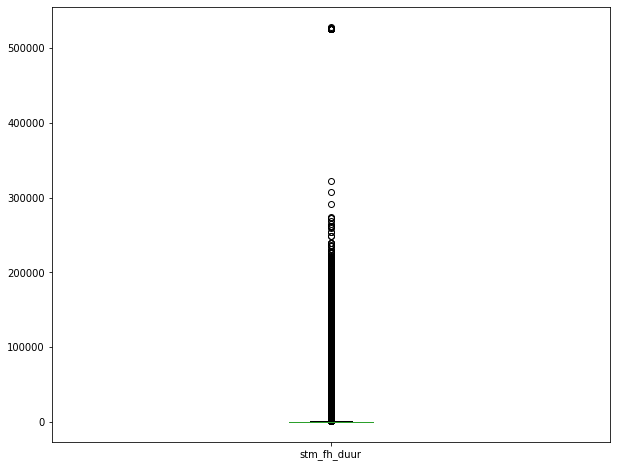

In [8]:
data.plot.box(figsize=(10, 8))

In [9]:
data = data.sort_values()

q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
print(q1, q3, iqr)

zwakke_lower = data[(data<=q1-1.5*iqr)&(data>q1-3*iqr)].count()
sterke_lower = data[data<q1-3*iqr].count()
zwakke_upper = data[(data>=q3+1.5*iqr)&(data<q3+3*iqr)].count()
sterke_upper = data[data>q3+3*iqr].count()

print(len(data))
print()
print(sterke_upper)
print(zwakke_upper)
print(zwakke_lower)
print(sterke_lower)

54.0 378.0 324.0
726775

73187
43914
0
0


In [10]:
 data.mean()

1141.2584266107117

In [11]:
#np.sqrt(mean_squared_error(data, [data.mean()]))


#lijst = []
#for i in data:
#    lijst.append((i - (data.mean()))**2)
#RMSE = np.sqrt(sum(lijst)/len(lijst))
#RMSE

In [12]:
#data2 = data.sample(n=20000)
#data2 = data.copy()
#def fun1(x):
#    return (x - data.mean())**2
#
#data = data.apply(fun1)
#data

In [13]:
#np.sqrt(data.mean())

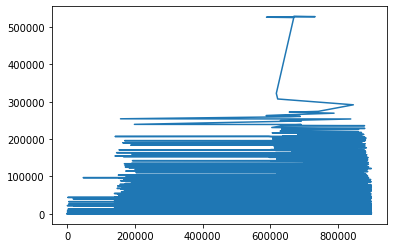

In [14]:
plt.plot(data)
plt.show()

In [15]:
len(data[data < data.mean()])

638074

In [16]:
len(data[data < data.mean()])/len(data)*100

87.79525988098105

Baseline: Alle hersteltijden duren korter dan 1141 minuten (+- 19 uur)
score: in 88% van de gevallen is de reparatietijd korter dan gemiddeld.

In [17]:
data = data.to_frame() # zet om  Series naar dataframe
data['Median']=  data['stm_fh_duur'].median()
data['Mean'] = data['stm_fh_duur'].mean()

In [18]:
data.head()

,stm_fh_duur,Median,Mean
716924,1.0,120.0,1141.258427
140064,1.0,120.0,1141.258427
536888,1.0,120.0,1141.258427
461109,1.0,120.0,1141.258427
268409,1.0,120.0,1141.258427


In [19]:
# De kwaliteit/score van de model bepalen mbh van RMSE
np.sqrt(mean_squared_error(data.loc[:,'stm_fh_duur'],data.loc[:,'Median']))

7176.591598082251

In [20]:
# De kwaliteit/score van de model bepalen mbh van RMSE
np.sqrt(mean_squared_error(data.loc[:,'stm_fh_duur'],data.loc[:,'Mean']))

7103.555320523756

### Conclusie voor de baseline model 

Er is voor onze baseline model  gekozen om  de mediaan als   voorspelde  waarde te gebruiken.

In [21]:
print(str(df['stm_oorz_groep'].loc[df['stm_fh_duur'] == df['stm_fh_duur'].max()]))

670693    ONR-DERD
Name: stm_oorz_groep, dtype: object


In [ ]:
df.columns